# Predict EDA Kutlwano Ngwarati

## Connect SQL to Python

## #Import Packages

In [2]:
import sqlalchemy as sa

import pandas as pd

from sqlalchemy import create_engine

### Connect to Database

In [3]:
Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Kutlwano'

In [4]:
connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database
)

In [5]:
sql_query = "Select * from football_players"

In [6]:
df = pd.read_sql_query(sql_query, connection)

### Create Position Type

In [7]:
def position_type(s):
    
    """This function converts the individual positions (abbreviations) and classfies it
    as either a forward, midfielder, back or goal keeper"""
    
    if (s[-2] == 'T') | (s[-2] == 'W'):
        return 'Forward'
    elif s[-2] == 'M':
        return 'Midfielder'
    elif s[-2] == 'B':
        return 'Back'
    else:
        return 'GoalKeeper'

df['Preferred Positions Type'] = df['Preferred Positions'].apply(position_type)

### Transform Attribute Columns to Float

In [8]:
# Select all attribute columns
cols = ['Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

def to_float(x):    
    "Transforms attribute columns to type float"
    
    if type(x) is int:
        return float(x)
    else:
        return float(x[0:2])

df[cols] = df[cols].applymap(to_float)

## EDA 1

Determine the player with the highest overall rating from the Country selected - sorted by Overall and then by Country(both descending order)

In [9]:
def best_player(country):
    
    df_Player =df[df['Nationality'] == country].sort_values (by = ['Overall', 'Nationality'], ascending = False)
    df_Best_Player = df_Player[df_Player['Overall'] == df_Player['Overall'].max()]
    
    return df_Best_Player

In [10]:
best_player('England')

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Preferred Positions Type
238,H. Kane,23,England,86.0,68.0,74.0,73.0,62.0,82.0,84.0,...,87.0,38.0,74.0,85.0,36.0,86.0,75.0,73.0,ST,Forward


## EDA 2

Draw a Scatter Plot of the Age vs Acceleration

In [13]:
%matplotlib inline

In [23]:
df.Acceleration = pd.to_numeric(df.Acceleration ,errors = "coerce")
df.Age = pd.to_numeric(df.Age, errors = 'coerce')
df_filtered = df[df.Acceleration<=100]

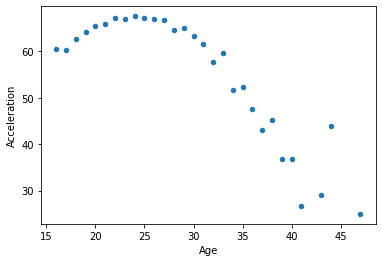

In [24]:
df_filtered.groupby('Age').mean().reset_index().plot.scatter('Age','Acceleration')

## EDA 3

Determine the best players from the selected country - sorted by Country and Name (both descending order)

That has a vision score above a certain level (max_vision)
And plays the specified position (position)

In [26]:
def best_player(country, max_vision, position):
    
    df_Country =df[df['Nationality'] == country].sort_values (by = ['Nationality', 'Name'], ascending = False)
    df_Best_Player = df_Country[(df_Country['Vision'] > max_vision) & (df_Country['Preferred Positions Type'] == position)]
    
    return df_Best_Player

In [29]:
best_player('Portugal', 80, 'Forward')

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Preferred Positions Type
192,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,Forward


Predict EDA on Football Players designed by Kutlwano Ngwarati